In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

# Simple illustration

final value of L= 6.129982163463559e-06 , W= 0.002475880078570761


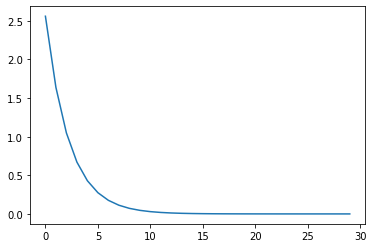

In [ ]:
# Loss function L(w) = w*w
w = 2
L = []
step = 0.1
epochs = 30

for i in range (epochs):
  w = w - step * 2 * w
  L.append(w * w)

plt.plot(L)
print ("final value of L=", L[-1], ", W=", w)

In [ ]:
L

[2.5600000000000005,
 1.6384,
 1.048576,
 0.67108864,
 0.42949672960000007,
 0.2748779069440001,
 0.17592186044416008,
 0.11258999068426244,
 0.07205759403792797,
 0.046116860184273904,
 0.029514790517935298,
 0.018889465931478586,
 0.012089258196146296,
 0.007737125245533629,
 0.0049517601571415215,
 0.003169126500570574,
 0.0020282409603651673,
 0.001298074214633707,
 0.0008307674973655726,
 0.0005316911983139664,
 0.00034028236692093853,
 0.00021778071482940063,
 0.00013937965749081642,
 8.920298079412252e-05,
 5.7089907708238416e-05,
 3.653754093327259e-05,
 2.3384026197294458e-05,
 1.4965776766268452e-05,
 9.578097130411809e-06,
 6.129982163463559e-06]

# Simple Gradient descent step by step

In [10]:
X = [1.0, 2.0, 3.0]
y = [1.2, 1.8, 3.4]

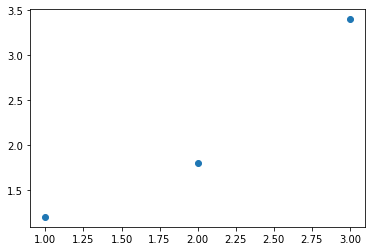

In [11]:
plt.scatter(X,y)

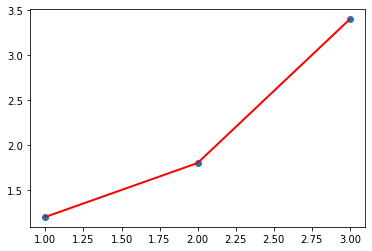

In [12]:
plt.scatter(X,y)
plt.plot(X[:3], y[:3], 'r-', lw=2)

No straight line passes through the three points. We must therefore find the line (equation y = ax + b) which passes the closest to the three points. It is a linear regression.

We will use the mean squared error (MSE) to calculate the error: [Cf. wikipédia](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ddb65cf6e65292f15ae3f64e0048a00eaaf72db)

Random initialization of a and b:

In [13]:
a = 1
b = 0

Gradient descent implementation:

In [14]:
def gradient_descent(_X, _y, _learningrate=0.06, _epochs=5):
    trace = pd.DataFrame(columns=['a', 'b', 'mse'])
    X = np.array(_X)
    y = np.array(_y)
    a, b = 0.2, 0.5 
    iter_a, iter_b, mse = [], [], []
    N = len(X) 
    
    for i in range(_epochs):
        delta = y - (a*X + b)
        
        # Updating a and b
        a = a -_learningrate * (-2 * X.dot(delta).sum() / N)
        b = b -_learningrate * (-2 * delta.sum() / N)

        trace = trace.append(pd.DataFrame(data=[[a, b, mean_squared_error(y, (a*X + b))]], 
                                          columns=['a', 'b', 'mse'], 
                                          index=['epoch ' + str(i+1)]))

    return a, b, trace

Simple function to visualize results

In [15]:
def displayResult(_a, _b, _trace, X, y):
  plt.figure( figsize=(30,5))

  plt.subplot(1, 4, 1)
  plt.grid(True)
  plt.title("Distribution & line result")
  plt.scatter(X, y)
  plt.plot([X[0], X[len(X)-1]], [_a * X[0] + _b, _a * X[len(X)-1] + _b], 'r-', lw=2)

  plt.subplot(1, 4, 2)
  plt.title("Iterations (Coeff. a) per epochs")
  plt.plot(_trace['a'])

  plt.subplot(1, 4, 3)
  plt.title("Iterations (Coeff. b) per epochs")
  plt.plot(_trace['b'])

  plt.subplot(1, 4, 4)
  plt.title("MSE")
  plt.plot(_trace['mse'])

  print (_trace)

                a         b       mse
epoch 1  0.568000  0.648000  0.366272
epoch 2  0.694400  0.689920  0.168212
epoch 3  0.739955  0.696474  0.143830
epoch 4  0.758427  0.691308  0.138936
epoch 5  0.767794  0.682328  0.136284


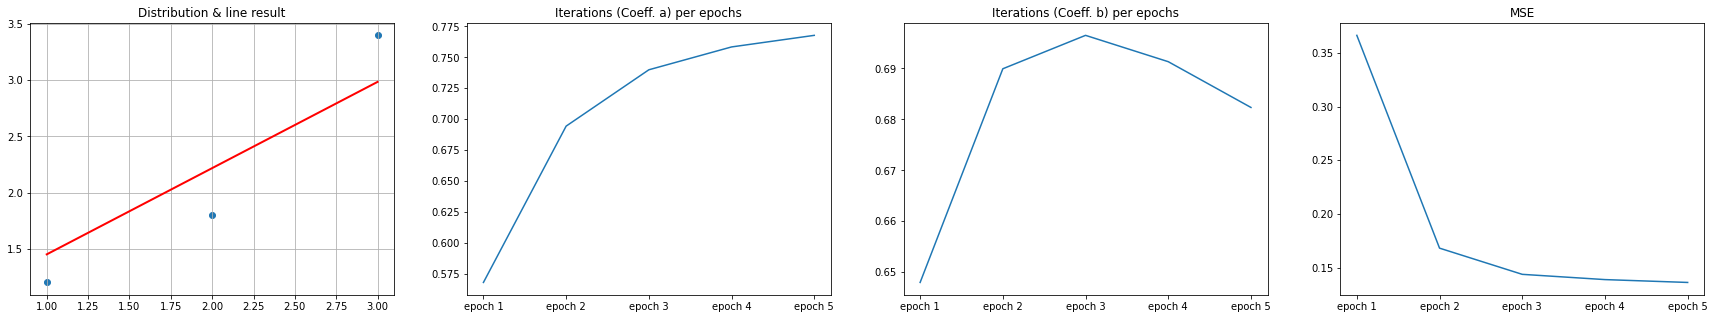

In [16]:
a, b, trace = gradient_descent(X, y, _epochs=5)
displayResult(a, b, trace, X, y)

# SGD : Stochastic Gradient Descent

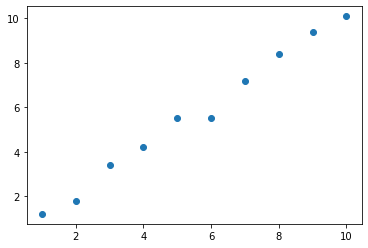

In [17]:
X = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [1.2, 1.8, 3.4, 4.2, 5.5, 5.5, 7.2, 8.4, 9.4, 10.1]
plt.scatter(X,y)

Create a batch (data package) of 3 data items:

In [110]:
# Select randomly 3 items index (random from 0 to length)) in the dataset
idx = np.random.randint(0, len(X), 3)
# take the items by selecting their index
np.take(X, idx)

array([4., 1., 1.])

In [18]:
def SGD(_X, _y, _learningrate=0.06, _epochs=5, _batch_size=1):
    a, b = 0.2, 0.5 
    trace = pd.DataFrame(columns=['a', 'b', 'mse'])

    for i in range(_epochs):
        # stochastic stuff / create batch (data packages) here
        indexes = np.random.randint(0, len(_X), _batch_size) # random sample
        X = np.take(np.array(_X), indexes)
        y = np.take(np.array(_y), indexes)

        N = len(X)
        delta = y - (a*X + b)
        
        # Updating a and b
        a = a - _learningrate * (-2 * X.dot(delta).sum() / N)
        b = b - _learningrate * (-2 * delta.sum() / N)

        trace = trace.append(pd.DataFrame(data=[[a, b, mean_squared_error(np.array(y), a*np.array(X)+b)]], 
                                          columns=['a', 'b', 'mse'], 
                                          index=['epoch ' + str(i+1)]))

    return a, b, trace

                    a            b           mse
epoch 1      3.039200     0.908000  1.417551e+02
epoch 2     -7.927456    -0.495962  3.496844e+03
epoch 3     39.991966     6.239181  7.012323e+04
epoch 4     -5.089129    -7.591621  6.664393e+02
epoch 5     23.863694    -3.448766  1.705406e+04
epoch 6    -75.517108   -17.867388  2.315813e+05
epoch 7    314.975158    35.729795  4.187447e+06
epoch 8  -1832.366333  -232.277713  1.949208e+08
epoch 9   8091.933714  1027.617788  3.000739e+09
epoch 10 -9828.298793 -2590.960511  1.929170e+09


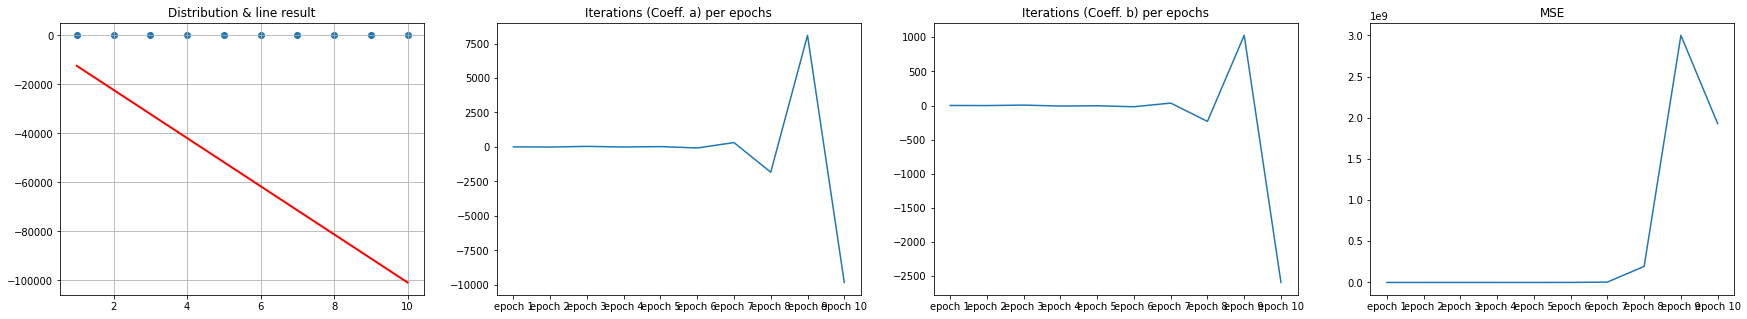

In [19]:
a, b, trace = SGD(X, y, _epochs=10, _batch_size=5,  _learningrate=0.06)
displayResult(a, b, trace, X, y)

**Ouch !! what happened ?**



1.   zigzag may imply a learning rate to big !
2.   Less data would also mean more epochs ...



                 a         b        mse
epoch 1   0.228640  0.504200  19.948755
epoch 2   0.242084  0.506598   9.602492
epoch 3   0.262184  0.509858  13.741971
epoch 4   0.281930  0.513042  13.275563
epoch 5   0.313173  0.517429  18.951257
epoch 6   0.336842  0.520820  14.462831
epoch 7   0.351488  0.523424   8.919061
epoch 8   0.387900  0.527511  19.674059
epoch 9   0.406717  0.530106   9.173711
epoch 10  0.416848  0.532428   5.448680


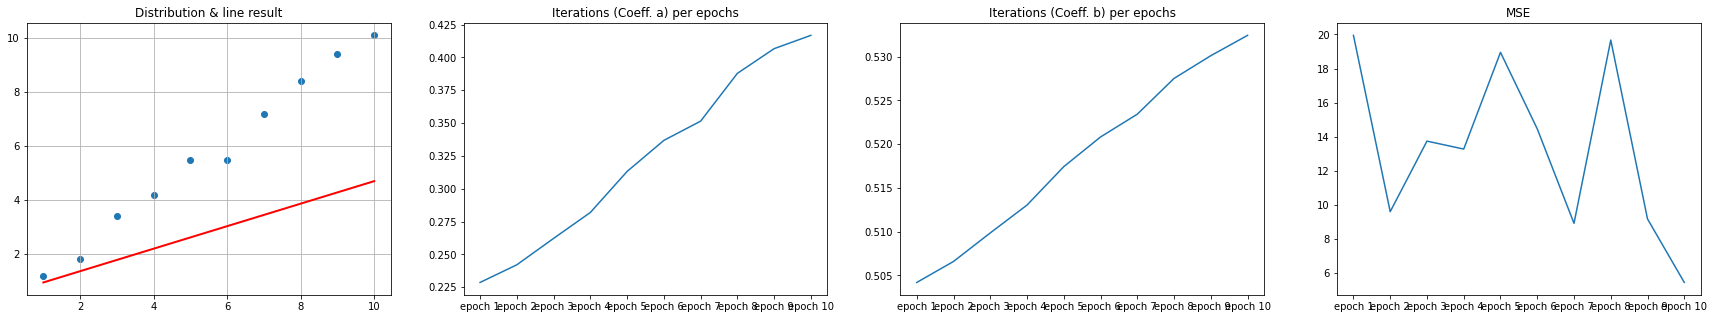

In [20]:
a, b, trace = SGD(X, y, _epochs=10, _batch_size=5,  _learningrate=0.0005)
displayResult(a, b, trace, X, y)

                  a         b        mse
epoch 1    0.239460  0.504940  27.596629
epoch 2    0.287045  0.510567  29.986678
epoch 3    0.306237  0.513416  12.007693
epoch 4    0.326291  0.516313  11.704401
epoch 5    0.344410  0.519680  11.075909
...             ...       ...        ...
epoch 96   0.924899  0.598034   0.171372
epoch 97   0.925134  0.598011   0.043217
epoch 98   0.924602  0.597668   0.147850
epoch 99   0.922300  0.597207   0.338254
epoch 100  0.921900  0.597038   0.118324

[100 rows x 3 columns]


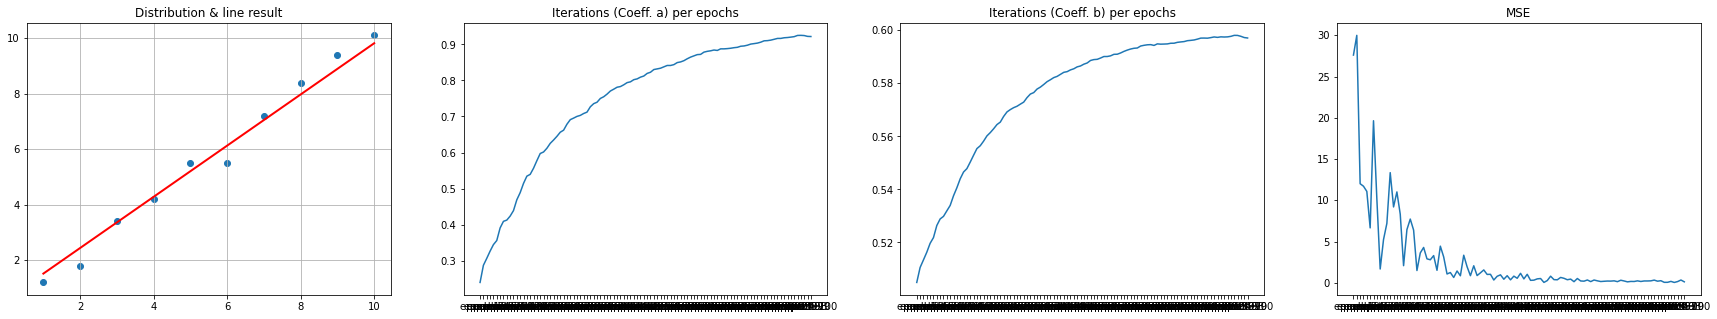

In [22]:
a, b, trace = SGD(X, y, _epochs=100, _batch_size=5,  _learningrate=0.0005)
displayResult(a, b, trace, X, y)